<a href="https://colab.research.google.com/github/Hari0077/web-scraping-using-python/blob/main/read_images_from_local_and_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_dir = "/content/drive/MyDrive/thyroid_images/train"
validation_data_dir = "/content/drive/MyDrive/thyroid_images/validation"

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
img  = image.load_img("/content/drive/MyDrive/thyroid_images/train/Benign/124_1.jpg")

In [9]:
import cv2

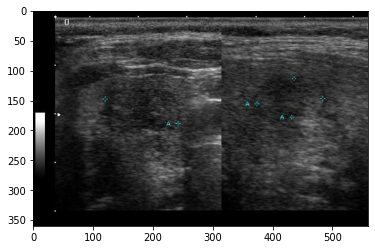

In [8]:
plt.imshow(img)

In [12]:
cv2.imread("/content/drive/MyDrive/thyroid_images/train/Benign/124_1.jpg")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [28]:
img_width=200
img_height=200
batch_size=3

In [14]:
datagen=ImageDataGenerator(rescale=1.0/255)

In [15]:
train_data_gen=datagen.flow_from_directory(train_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['Benign','Malign'],
                                           class_mode='binary')
validation_data_gen=datagen.flow_from_directory(validation_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['Benign','Malign'],
                                           class_mode='binary')


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [16]:
train_data_gen.class_indices

{'Benign': 0, 'Malign': 1}

In [17]:
train_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [20]:
model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
     ##
      tf.keras.layers.Flatten(),
     ##
     tf.keras.layers.Dense(512,activation='relu'),
      ##
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [22]:
from tensorflow.keras.optimizers import RMSprop

In [25]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [30]:
model_fit = model.fit(train_data_gen,
                      steps_per_epoch=13,
                      epochs = 10,
                      validation_data = validation_data_gen)

Epoch 1/10
13/13 [==============================] - 2s 45ms/step - loss: 1.8777 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.4500


In [31]:
import os

4_1.jpg


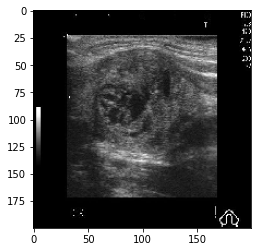

Malign
101_1.jpg


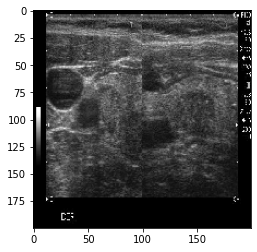

Malign
33_1.jpg


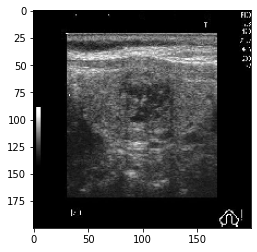

Malign
26_1.jpg


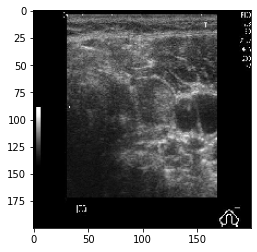

Malign
85_2.jpg


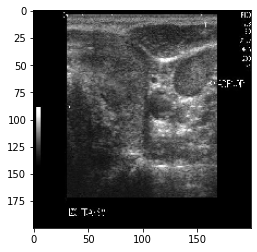

Malign
81_1 (copy).jpg


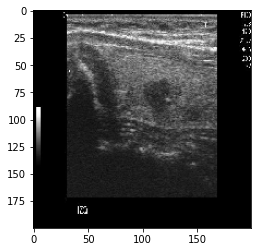

Malign
21_1.jpg


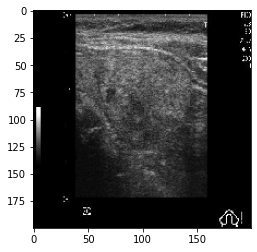

Malign
81_2 (copy).jpg


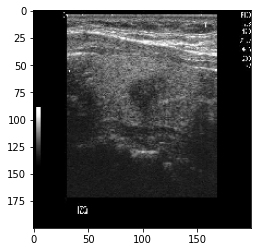

Malign
19_1 (copy).jpg


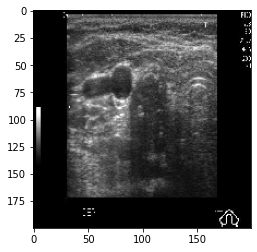

Malign
12_1.jpg


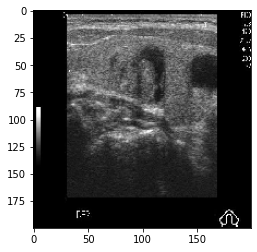

Malign
5_1 (copy).jpg


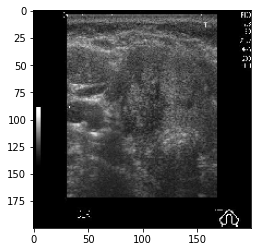

Malign
285_1.jpg


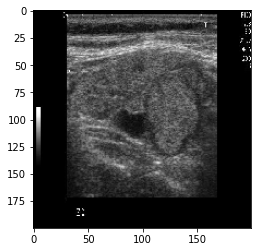

Malign
247_1.jpg


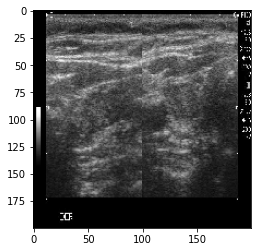

Malign
193_1.jpg


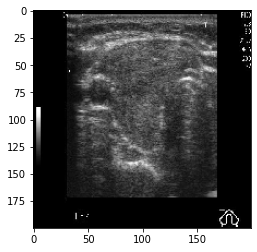

Malign
204_1.jpg


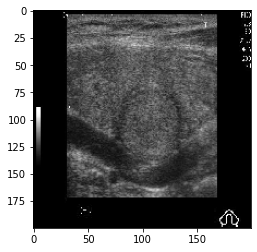

Malign
190_1.jpg


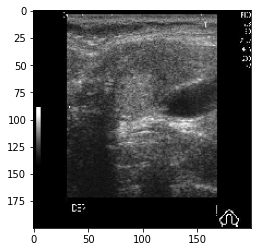

Malign
134_1.jpg


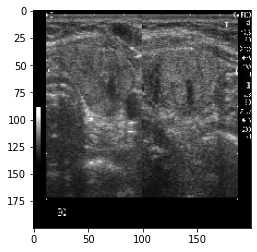

Malign
127_1.jpg


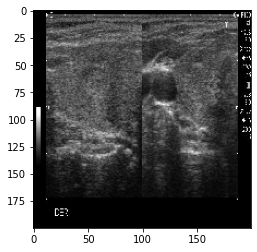

Malign
61_1.jpg


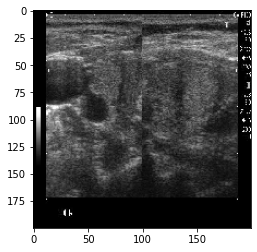

Malign
2_1.jpg


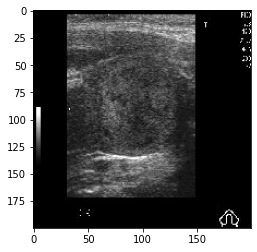

Malign


In [42]:
dir_path = '/content/drive/MyDrive/thyroid_images/test'

for i in os.listdir(dir_path):
    print(i)
    img = image.load_img(dir_path+'/'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
      print("Benign")
    else:
      print("Malign")
